# Model Development

## Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("2022_Car_Data_Cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


## Linear and Multiple Linear Regression

#### Simple Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lm1  = LinearRegression()

In [6]:
X = df[['highway-L/100km']]

In [7]:
Y = df['price']

In [8]:
X.shape, Y.shape

((201, 1), (201,))

In [9]:
lm1.fit(X,Y)

LinearRegression()

In [10]:
Yhat1 = lm1.predict(X)

In [11]:
type(Yhat1)

numpy.ndarray

In [12]:
Yhat1[0:5]

array([15485.52737455, 15485.52737455, 16643.34931414, 12475.19033163,
       22327.2024721 ])

In [13]:
lm1.coef_, lm1.intercept_

(array([3458.68511314]), -14617.843054664605)

In [14]:
lm2 = LinearRegression()
lm2.fit(df[['engine-size']], df['price'])
print(lm2.coef_,lm2.intercept_)

[166.86001569] -7963.338906281024


In [15]:
Yhat2 = lm2.predict(df[['engine-size']])

In [16]:
Yhat2[0:4]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408])

#### Multiple Linear Regression

In [17]:
Z = df[['horsepower','curb-weight','engine-size','highway-L/100km']]

In [18]:
lm3 = LinearRegression()

In [19]:
lm3.fit(Z, Y)

LinearRegression()

In [20]:
lm3.coef_,lm3.intercept_

(array([ 36.71264156,   3.50108045,  85.34516358, 499.5518178 ]),
 -14383.535206928053)

In [21]:
Yhat3 = lm3.predict(Z)

In [22]:
Yhat3[0:5]

array([14055.14326508, 14055.14326508, 18641.40645967, 10758.95798023,
       16668.53370034])

## Model Evaluation Using Visualization

In [23]:
import seaborn as sns

#### Simple Linear Regression

<AxesSubplot: xlabel='highway-L/100km', ylabel='price'>

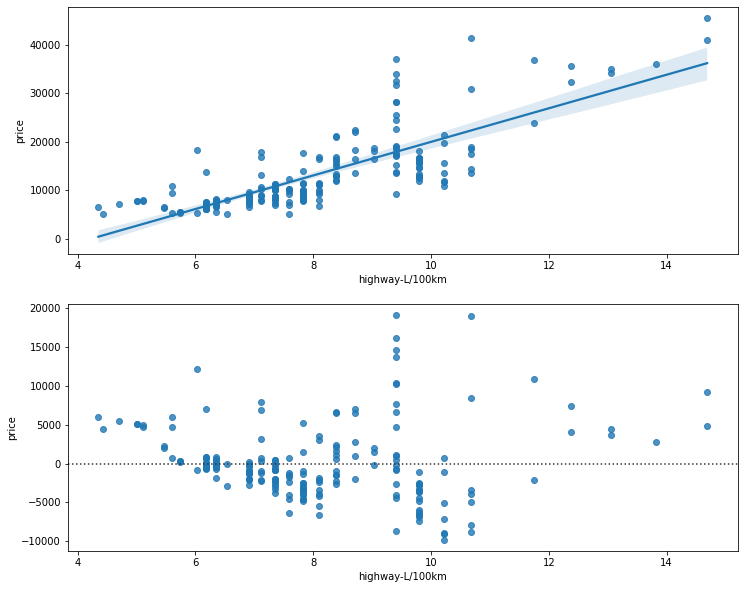

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows  = 2, ncols = 1, figsize  = (12,10))
sns.regplot(x = 'highway-L/100km', y = 'price', data = df, ax = ax1)
sns.residplot(x = 'highway-L/100km', y  = 'price', data = df, ax = ax2)

#### Multiple Linear Regression

In [25]:
df[['horsepower','curb-weight','engine-size','highway-L/100km']].corr()

,horsepower,curb-weight,engine-size,highway-L/100km
horsepower,1.000000,0.757994,0.822649,0.840668
curb-weight,0.757994,1.000000,0.849072,0.836921
engine-size,0.822649,0.849072,1.000000,0.783465
highway-L/100km,0.840668,0.836921,0.783465,1.000000


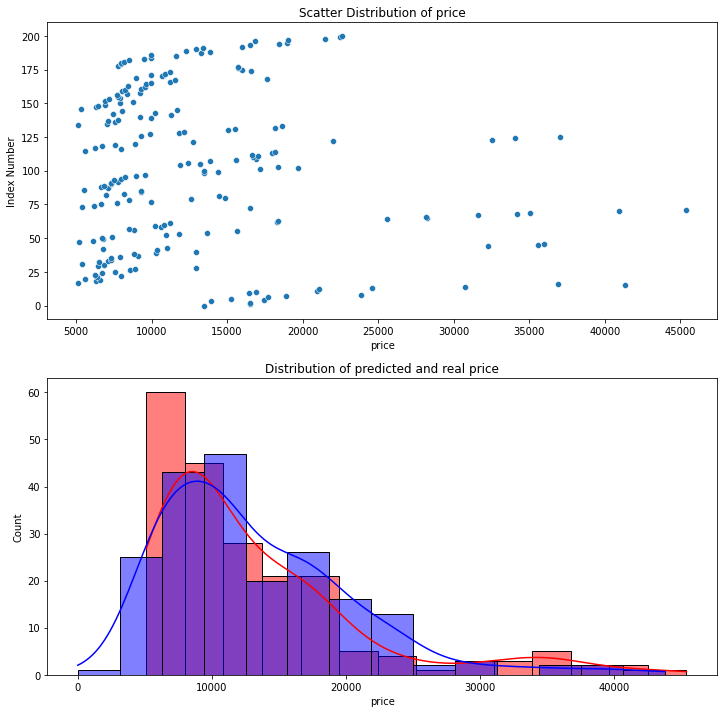

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows  = 2, ncols = 1, figsize  = (12,12))
sns.scatterplot( x = 'price', y = df.index, data = df, ax = ax1)
ax1.set_title('Scatter Distribution of price')
ax1.set_ylabel('Index Number')
sns.histplot(data = df['price'], color = 'r',kde = True, label= 'Actual Value', ax = ax2)
sns.histplot(data = Yhat3, color = 'b',kde= True, label= 'Fitted_Value', ax = ax2)
ax2.set_title('Distribution of predicted and real price')
plt.show()

## Polynomial Regression

In [27]:
def PlotPolly(model, ind_var_name ,ind_var_val, real_val):
    pred_val = model(ind_var_val)
    plt.plot(ind_var_val, real_val,'.', c = 'blue')
    plt.plot(ind_var_val, pred_val, '.', c = 'red')
    plt.title(f"Predicted Price vs Real Price plotted with {ind_var_name}")
    plt.xlabel(ind_var_name)
    plt.ylabel('Price')
    plt.show()
    plt.close()

In [28]:
# Cannot use X,  as X = df[['...']] and x = df['...']

In [29]:
x = df['highway-L/100km']

In [30]:
fit1 = np.polyfit(x, Y, 3)
polynomial1 = np.poly1d(fit1)

In [31]:
fit1 # polyfit only gives coeff and interceptor, poly1d makes equation

array([  -23.40461026,   923.57034965, -7083.14334079, 21515.16034362])

In [32]:
polynomial1

poly1d([  -23.40461026,   923.57034965, -7083.14334079, 21515.16034362])

In [33]:
print(polynomial1)

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


In [34]:
Yhat_p1 = polynomial1(df['highway-L/100km'])

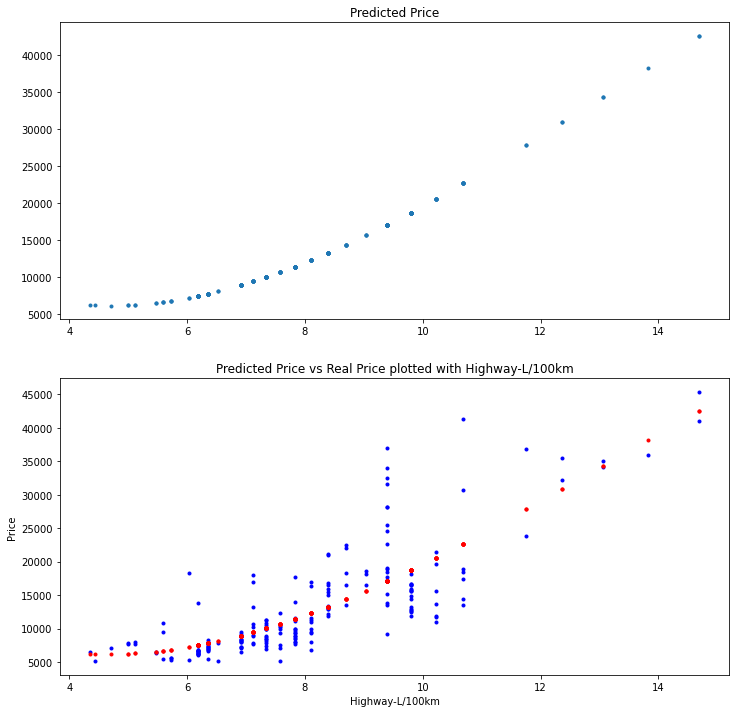

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows  = 2, ncols = 1, figsize  = (12,12))
ax1.plot(df['highway-L/100km'], Yhat_p1,'.')
ax1.set_title('Predicted Price')
ax2.Plot = PlotPolly(polynomial1, 'Highway-L/100km', df['highway-L/100km'], df['price'])

In [36]:
fit2 = np.polyfit(x,Y,11)
polynomial2 = np.poly1d(fit2)

In [37]:
print(polynomial2)

          11          10         9         8             7
0.003545 x  - 0.4733 x  + 26.87 x - 870.3 x + 1.803e+04 x
              6             5             4            3             2
 - 2.523e+05 x + 2.441e+06 x - 1.637e+07 x + 7.47e+07 x - 2.213e+08 x + 3.832e+08 x - 2.943e+08


In [38]:
Yhat_p2 = polynomial2(df['highway-L/100km'])

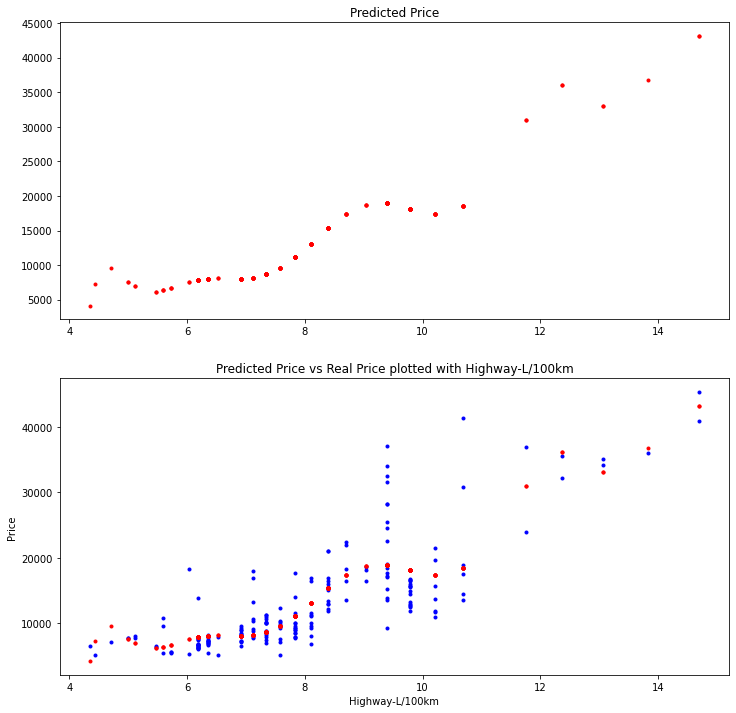

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows  = 2, ncols = 1, figsize  = (12,12))
ax1.plot(df['highway-L/100km'],Yhat_p2, '.',c = 'red')
ax1.set_title('Predicted Price')
ax1.ticklabel_format(useOffset=False)
ax2.plot =  PlotPolly(polynomial2, 'Highway-L/100km', df['highway-L/100km'], df['price'])

## Polynomial Multivariate 

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [41]:
# Default degree in Polynomial Features is 2
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [42]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]

In [43]:
Z_pr = pr.fit_transform(Z)

In [44]:
print(Z.shape,Z_pr.shape)

(201, 4) (201, 15)


In [45]:
type(Z), type(Z_pr)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [46]:
lm_pm = LinearRegression()

In [47]:
lm_pm.fit(Z_pr,Y)

LinearRegression()

In [48]:
Yhat_pm  = lm_pm.predict(Z_pr)

In [49]:
Yhat_pm[0:10]

array([12395.97939241, 12395.97939241, 18425.76361781,  9981.83005509,
       17552.10180771, 13495.52907994, 14610.64282949, 15069.81768809,
       19740.53605423, 10021.73195239])

## Pipeline

In [50]:
from sklearn.pipeline import Pipeline

In [51]:
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [52]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [53]:
pipe.fit(Z,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [54]:
ypipe = pipe.predict(Z)

In [55]:
ypipe[0:10]

array([12395.97939239, 12395.97939239, 18425.76361762,  9981.83005507,
       17552.10180769, 13495.52907994, 14610.64282949, 15069.81768809,
       19740.53605408, 10021.73195238])

In [56]:
Input2 = [('scale', StandardScaler()),('model',LinearRegression())]
pipe2  = Pipeline(Input2)
pipe2.fit(Z,Y)
ypipe2 = pipe2.predict(Z)
ypipe2[0:10]

array([14055.14326508, 14055.14326508, 18641.40645967, 10758.95798023,
       16668.53370034, 14734.79338711, 15914.6574987 , 16299.77634818,
       18610.5191684 , 10974.89925173])

## Quantative Evaluation

#### R-squared (coefficient of determination) and MSE (mean squared error)

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [58]:
# X = df['highway-L/100km']
# Y = df['price']
# Z = df[]
# lm1 = Simple Linear Regression(X,Y)
# lm3 = Multiple Linear Regression(Z,Y)
# lm_p1 = Polynomial fit degree  = 2 
# lm_pm = Polynomial Multivariate

#### Linear Regression

In [59]:
lm1.score(X,Y)

0.6417894513258818

In [60]:
mean_squared_error(Y,Yhat1)

22510543.777085222

#### Multiple Linear Regression

In [61]:
lm3.score(Z,Y)

0.8118374865547417

In [62]:
mean_squared_error(Y,Yhat3)

11824443.78534828

#### Polynomial

In [63]:
r2_score(Y, Yhat_p1)

0.6753581660812171

In [64]:
mean_squared_error(Y, Yhat_p1)

20401030.180019397

In [65]:
r2_score(Y,Yhat_pm)

0.8531394061615483

In [66]:
mean_squared_error(Y,Yhat_pm)

9228962.795667836

## Prediction With Test Data

In [67]:
test_data = np.arange(1,100,1).reshape(-1,1)

In [68]:
lm_p = LinearRegression()

In [69]:
lm_p.fit(X.values,Y)

LinearRegression()

In [70]:
yhat_test = lm_p.predict(test_data)
yhat_test[0:4]

array([-11159.15794152,  -7700.47282838,  -4241.78771523,   -783.10260209])

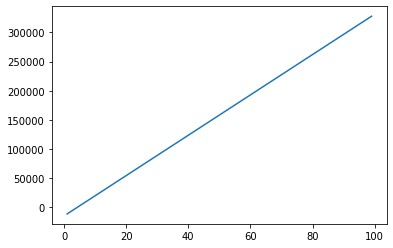

In [71]:
plt.plot(test_data, yhat_test)
plt.show()

### Final thoughts

### In this case MLR model is most suitable. Because its R-squared is largest and MSE is lowest.

### Thank You